 ## 5.3.4 The Bootstrap

This code is a translation of chapter five of ISL from https://github.com/hardikkamboj

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
portfolio = pd.read_csv(r'../../../data/Portafolio.csv')
print(portfolio.shape)
portfolio.head()

(100, 2)


,X,Y
0,-0.895251,-0.234924
1,-1.562454,-0.885176
2,-0.417090,0.271888
3,1.044356,-0.734198
4,-0.315568,0.841983


In [6]:
portfolio

,X,Y
0,-0.895251,-0.234924
1,-1.562454,-0.885176
2,-0.417090,0.271888
3,1.044356,-0.734198
4,-0.315568,0.841983
...,...,...
95,0.479091,1.454774
96,-0.535020,-0.399175
97,-0.773129,-0.957175
98,0.403634,1.396038


In [84]:
# we first define a function equivalent to func alpha defined in the Lab, i would recommend you to go through the function in lab
# This function takes two arguements, data and indeces, this indices are used to calculate the estimate for alpha for this bootstrap

In [3]:
def alpha(data,index):
    X = data['X'].loc[index]
    y = data['Y'].loc[index]
    
    return (np.var(y) - np.cov(X,y)[0][1]) / (np.var(X) + np.var(y) - 2*(np.cov(X,y)[0][1]))

In [4]:
# equivalent to sample function in lab
def get_indices(data,num_samples):
    return  np.random.choice(data.index, num_samples, replace=True)

In [5]:
portfolio.index

RangeIndex(start=0, stop=100, step=1)

In [88]:
alpha(portfolio,np.arange(0,100))

0.5766511516104116

In [7]:
np.arange(0,100)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [90]:
#np.random.seed(2)
alpha(portfolio,get_indices(portfolio,100))

0.7327949681000907

In [8]:
# there is no built in function like boot, so, we will define one
def boot(data,func,R):
    estimates = []
    for i in range(R):
        estimates.append(func(data,get_indices(data,100)))
    bootstrap_statistics = {'estimated_value':np.mean(estimates),'std_error':np.std(estimates)}   
    return estimates, bootstrap_statistics

In [9]:
np.random.seed(0)
results = boot(portfolio,alpha,1000)

In [11]:
results[0]

[0.5603366580074971,
 0.6517460709422397,
 0.6419836035890758,
 0.5265088969761128,
 0.6129481314604421,
 0.5220990429150475,
 0.46774999790450317,
 0.7534400396651759,
 0.5174396271611137,
 0.34067531376902926,
 0.5546745734082351,
 0.5072637067599202,
 0.45677697004420864,
 0.8423230879591777,
 0.5143789540560136,
 0.5805341099440869,
 0.5513765217561826,
 0.6162375108796402,
 0.6564123035990483,
 0.45009758976211567,
 0.41262200164768287,
 0.4861767351446106,
 0.616857207263681,
 0.6318117345712747,
 0.5070456037771569,
 0.5365819164424743,
 0.5384000563157036,
 0.6125353806080615,
 0.4759029693761374,
 0.567682587282195,
 0.5966444325068893,
 0.44780638590112215,
 0.5937119675282221,
 0.5329203923725827,
 0.5511526764494891,
 0.6785966281677542,
 0.5669849533897658,
 0.5239220480311272,
 0.4928405177496642,
 0.5741044120632085,
 0.5497199987174153,
 0.44702787492540697,
 0.5810848676405479,
 0.6214292190155756,
 0.6578019726680295,
 0.5365414409490078,
 0.6694617437525651,
 0.40557

In [12]:
results[1] 

{'estimated_value': 0.580591309592219, 'std_error': 0.08980409161302537}

C:\Users\Roberto\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


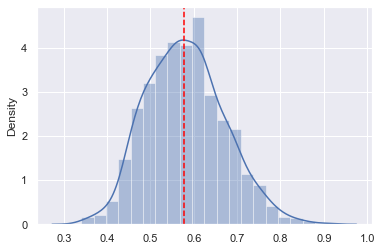

In [95]:
sns.set_theme()
ax = sns.distplot(results[0], bins=20)

plt.axvline(x=0.5766511516104116, color='red', ls='--')

In [96]:
results[1]

{'estimated_value': 0.580591309592219, 'std_error': 0.08980409161302537}

### Estimating the Accuracy of a Linear Regression Model


In [13]:
data = pd.read_csv(r'../../../data/Auto.csv')

In [14]:
# auto data used earlier in the notebook
data = data.reset_index()
data.head()

,index,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [20]:
n = data.shape[0] # sample size 

In [21]:
# similar to boot.fn in lab

def get_estimates(data,index):
    X = data['horsepower'].loc[index]
    y = data['mpg'].loc[index]
    
    lr = LinearRegression()
    lr.fit(X.to_frame(),y)   #  X.to_frame() to Dataframe format
    intercept = lr.intercept_
    coef = lr.coef_
    return [intercept,coef]

In [22]:
get_estimates(data,np.arange(0,392))[0]

39.93586102117047

In [23]:
#modifying the boot mentioned that we used earlier
def boot(data,func,R):
    intercept = []
    coeff = []
    for i in range(R):
        intercept.append(func(data,get_indices(data,n))[0])
        coeff.append(func(data,get_indices(data,n))[1]) 

    intercept_statistics = {'estimated_value':np.mean(intercept),'std_error':np.std(intercept)}   
    coeff_statistices = {'estimated_value':np.mean(coeff),'std_error':np.std(coeff)}   
    return {'intercept':intercept_statistics,'coeff_statistices':coeff_statistices}, coeff

In [24]:
results = boot(data,get_estimates,1000)

In [25]:
print('Result for intercept ',results[0]['intercept'])
print('Result for coefficient term ',results[0]['coeff_statistices'])

Result for intercept  {'estimated_value': 39.93367305554013, 'std_error': 0.8395611783428099}
Result for coefficient term  {'estimated_value': -0.15831717734448136, 'std_error': 0.007304606118670605}


C:\Users\Roberto\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


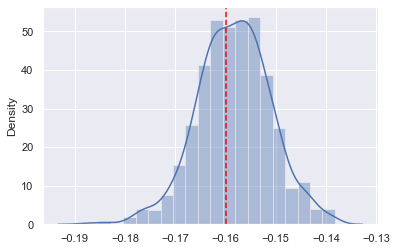

In [105]:
sns.set_theme()
ax = sns.distplot(results[1], bins=20)

plt.axvline(x=-0.15990445470981166, color='red', label='axvline - full height', ls='--')

In [106]:
# for bootstraping we have std error 1.69 for intercept, and 0.015 for ceoff

In [107]:
# for lets see what the model predicts
import statsmodels.api as sm
X = data['horsepower']
y = data['mpg']

X = sm.add_constant(X)
results = sm.OLS(y,X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 26 May 2022   Prob (F-statistic):           7.03e-81
Time:                        17:12:48   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

In [108]:
# standard error are less for estimations using model
# But still bootstrap estimates are mode preices, because they don't rely on assumptions, while there is a lot of assumptions
# when calculating std errors using sm(model)

In [109]:
# Adding a quad term
# similar to boot.fn in lab
data['horsepower_2'] = data['horsepower']**2

def get_estimates(data,index):
    X = data[['horsepower','horsepower_2']].loc[index]
    y = data['mpg'].loc[index]
    
    lr = LinearRegression()
    lr.fit(X,y)
    intercept = lr.intercept_
    coef = lr.coef_
    return [intercept,coef]

get_estimates(data,np.arange(0,392))

#modifying the boot mentioned that we used earlier
def boot(data,func,R):
    intercept = []
    coeff_1 = []
    coeff_2 = []
    for i in range(R):
        intercept.append(func(data,get_indices(data,n))[0])
        coeff_1.append(func(data,get_indices(data,n))[1][0]) 
        coeff_2.append(func(data,get_indices(data,n))[1][1])
    intercept_statistics = {'estimated_value':np.mean(intercept),'std_error':np.std(intercept)}   
    coeff_1_statistices = {'estimated_value':np.mean(coeff_1),'std_error':np.std(coeff_1)}   
    coeff_2_statistices = {'estimated_value':np.mean(coeff_2),'std_error':np.std(coeff_2)}   
    return {'intercept':intercept_statistics,'coeff_1_statistices':coeff_1_statistices,'coeff_2_statistics':coeff_2_statistices}, coeff_1, coeff_2 


In [110]:
results = boot(data,get_estimates,1000)

In [111]:
results = boot(data,get_estimates,1000)

print('Result for intercept ',results[0]['intercept'])
print('Result for coefficient term horsepower',results[0]['coeff_1_statistices'])
print('Result for coefficient term horsepower**2',results[0]['coeff_2_statistics'])


Result for intercept  {'estimated_value': 56.787819068516335, 'std_error': 2.0838414824160316}
Result for coefficient term horsepower {'estimated_value': -0.46717610831580614, 'std_error': 0.033037689153878204}
Result for coefficient term horsepower**2 {'estimated_value': 0.0012319763289424732, 'std_error': 0.00012118133257486262}


In [112]:
# for lets see what the model predicts
import statsmodels.api as sm
X = data[['horsepower','horsepower_2']]
y = data['mpg']

X = sm.add_constant(X)
ols = sm.OLS(y,X).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Thu, 26 May 2022   Prob (F-statistic):           5.40e-99
Time:                        17:12:58   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           56.9001      1.800     31.604   

C:\Users\Roberto\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "Histogram - horsepower's coefficient (Density)")

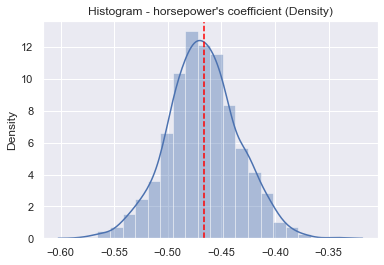

In [113]:
sns.set_theme()
ax = sns.distplot(results[1], bins=20)

plt.axvline(x= -0.4662, color='red', ls='--')
plt.title("Histogram - horsepower's coefficient (Density)")

C:\Users\Roberto\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "Histogram - square horsepower's coefficient (Density)")

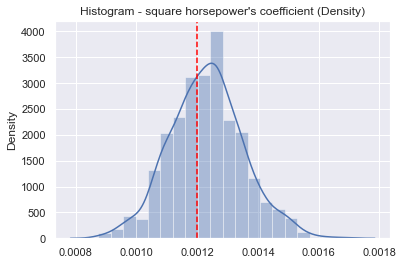

In [114]:
sns.set_theme()
ax = sns.distplot(results[2], bins=20)

plt.axvline(x= 0.0012, color='red', ls='--')
plt.title("Histogram - square horsepower's coefficient (Density)")